# Analyse exploratoire des données
## José Lise

### Lecture at analyse rapde des données

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine


In [2]:
# Load the data into a pandas dataframe
engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

In [3]:
# check the data
df_patient.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None


In [4]:
df_pcr.head()

,patient_id,pcr
0,653091,N
1,347667,Negative
2,708481,Positive
3,148825,Negative
4,150081,Negative


## Suppression des doublons (déduplication)

In [5]:
from detect_duplicates import detect_duplicates

In [6]:
df_clean = detect_duplicates(df_patient)

Percentage of duplicate rows:  6.975
Number of rows removed:  1395


###  Nettoyage de la clé patient_id de df_clean
La colonne patient_id est supposé être un clé et donc être unique. Or nous avons vu que cette clé est dupliquée que ce soit pour la table df_patient et df_pcr. Comme cette clé va être utilisé pour fusionner les tables, nous allons effacer les clés en double dans les deux tables au préalable. 

In [7]:
# Check the duplicated patient_id rows 
# We see that these are not the same persons but inconsistencies in the labelling
df_clean[df_clean.duplicated(subset=['patient_id'], keep=False)].sort_values(by=['patient_id'])

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
13590,109304,bailey,donaldson,20.0,tardent street,ryde,0812,qld,19580310.0,26.0,07 13479210,None
11027,109304,zachary,farronato,30.0,outtrim avenue,como,2196,vic,19090801.0,31.0,07 22894061,the reefs
3927,110207,toby,brock,4.0,merriman crescent,baralaba,3025,nsw,19000424.0,35.0,08 33842007,leitrim
11849,110207,zali,brock,32.0,hedger street,toorak,5038,act,NaN,22.0,08 96818512,None
18235,115791,marley,colquhoun,7.0,boolee street,craigie,2534,qld,19000705.0,NaN,04 59547776,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9518,990695,erin,braunack,49.0,moondarra street,broken hill,2640,qld,19830122.0,30.0,03 69523317,yuulong
7896,990936,amy,royle,90.0,whittell crescent,coramba,5032,sa,19950326.0,NaN,08 07309295,tewantin plaza
11446,990936,samantha,green,21.0,brierly street,ardrossan,2140,None,19380210.0,29.0,02 51600621,None
7156,994235,teresa,chowdhury,60.0,None,chester hill,2147,vic,19010407.0,27.0,02 83271460,None


In [8]:
# Remove the duplicated rows. In this case we remove all of them as we don't know which one is correct or not
# That's why we use the option keep=False in the duplicated method
df_clean = df_clean[~df_clean.duplicated(subset=['patient_id'], keep=False)]
df_clean.sort_values(by=['patient_id'])

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
16463,100005,kiana,halley,46.0,mccann street,undercliffe,4210,vic,19630118.0,32.0,07 32322867,None
14888,100015,michael,mcvicar,153.0,mountain circuit,wendouree,3338,nsw,19780918.0,27.0,08 55502793,None
11397,100037,ella,clarke,91.0,None,oyster bay,4208,vic,19800422.0,36.0,08 45736238,None
16163,100064,alexandra,jeffries,9.0,barlow street,joondanna,2617,vic,19020724.0,37.0,08 47796510,None
1237,100126,jayden,clarke,6.0,pennefather street,orange,2904,qld,19181210.0,29.0,03 27525454,lachlan view
...,...,...,...,...,...,...,...,...,...,...,...,...
2902,999607,joshua,ryan,105.0,tanumbirini street,mirrabooka,5109,sa,19990219.0,29.0,08 45059414,nareen gardens hostel
137,999684,charlie,hendricks,32.0,david street,yass,4740,sa,19351111.0,29.0,None,None
10759,999751,kierra,godfrey,262.0,macarthur avenue,st ives,3356,qld,19490722.0,19.0,03 61193186,None
1366,999885,mhary,ulrick,13.0,sonder close,clayton,4744,vic,19310509.0,NaN,07 14497722,None


### Analyse de la colonne date_of_birth après le nettoyage

In [9]:
df_clean[(df_clean['date_of_birth'].duplicated(keep=False) & df_clean['date_of_birth'].notnull())  & 
         (~df_clean.duplicated(subset=['date_of_birth', 'age'], keep=False) & df_clean['age'].notnull())
          ].sort_values(by=[ 'date_of_birth', 'age'])

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
16903,159263,danielle,haskett,7.0,bacchus circuit,highton,6004,vic,19000308.0,27.0,02 98666790,lakeside leisure vlge
11531,930890,reganne,fysh,41.0,fellows street,broadwater,4105,qld,19000311.0,35.0,04 74328837,None
16503,480129,keeley,arulanandam,27.0,carina street,albion park rail,3081,nsw,19000311.0,37.0,03 90267379,tannamurra
1325,357009,joshua,campbell,45.0,thring place,altona north,4032,nsw,19000322.0,8.0,02 45947636,None
14294,763632,erin,ryan,20.0,verbrugghen street,daisy hill,2200,nsw,19000419.0,22.0,04 35593327,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8657,571068,olivia,nguyen,34.0,ifould place,lyrup,6008,vic,19991205.0,10.0,07 08950579,None
11917,269807,abby,moody,93.0,corringle close,port macquarie,2077,qld,19991205.0,30.0,08 48630430,None
3555,291420,james,miles,39.0,myles close,scarborough,3206,None,19991215.0,27.0,03 76203772,None
16958,355560,sonja,frahn,29.0,prisk place,karuah,5451,vic,19991218.0,9.0,07 10184443,None


L'instruction dans la cellule précédente montre les personnes avec le même date_of_birth mais des age différents. Donc date_of_birth ne contient aucune information sur l'année de naissance. Et cette colonne ne sera pas utilisable pour la suite de l'analyse.

### Nettoyage de la clé patient_id de df_pcr

In [10]:
# we check the patient_id duplicates for the df_pcr dataframe
df_pcr[df_pcr.duplicated(subset=['patient_id'], keep=False)].sort_values(by=['patient_id'])

,patient_id,pcr
169,159500,N
2934,159500,N
8469,169519,Positive
1842,169519,Negative
5618,212217,N
...,...,...
5542,887646,Negative
1025,975512,Negative
2331,975512,N
7477,990695,N


On a déjà noté lors de l'analyse des problèmes que la colonne pcr n'est pas consistante: Quelquefois les test négatifs sont notés Negative et quelquefois N. Et idem pour les tests positif. Nous allons harmoniser cela et garder uniquement N et P comme indicateurs. 

In [11]:
# Clean the pcr column to keep only N and P values
df_pcr['pcr'] = df_pcr['pcr'].apply(lambda x: 'P' if x == 'Positive' else 'N')

Nous allons maintenant regarder les lignes dupliquées pour 'patient_id' et 'pcr'

In [12]:
# Check rows where 'patient_id' and 'pcr'
df_pcr[df_pcr.duplicated(subset=['patient_id', 'pcr'], keep=False)].sort_values(by=['patient_id'])

,patient_id,pcr
169,159500,N
2934,159500,N
8249,227192,N
1473,227192,N
8591,227309,N
5785,227309,N
3251,328071,P
4741,328071,P
3569,411955,N
4939,411955,N


Contrairement au dataframe df_patient, ici les lignes dupliqués sont vraiment identiques. Nous allons donc uniquement supprimer les lignes en doubles. 

In [13]:
 df_pcr = df_pcr[~df_pcr.duplicated(subset=['patient_id','pcr'], keep='last')]
df_pcr.sort_values(by=['patient_id'])

,patient_id,pcr
1900,100037,N
3919,100215,N
1733,100294,N
1672,100363,N
1880,100404,N
...,...,...
8770,999482,N
3453,999497,P
8010,999573,N
8326,999885,N


Regardons maintenant les lignes avec le même patient_id mais des pcr différents. 

In [14]:
# Rows with same patient_id but different pcr
# In this case we will remove both rows
df_pcr[df_pcr.duplicated(subset=['patient_id'], keep=False)].sort_values(by=['patient_id'])

,patient_id,pcr
1842,169519,N
8469,169519,P
8615,212217,P
5618,212217,N
6355,231458,N
2463,231458,P
1805,378910,N
5381,378910,P
2340,513532,P
3163,513532,N


On ne peut rien conclure sur ces patients. Il faut donc supprimer toutes les lignes se trouvant dans ce cas, ce qui est fait ci-dessous. 

In [15]:
 df_pcr = df_pcr[~df_pcr.duplicated(subset=['patient_id'], keep=False)]
df_pcr.sort_values(by=['patient_id'])

,patient_id,pcr
1900,100037,N
3919,100215,N
1733,100294,N
1672,100363,N
1880,100404,N
...,...,...
8770,999482,N
3453,999497,P
8010,999573,N
8326,999885,N


### Jointure des deux dataframe d_clean et df_pcr
Le dataframe issue de la jointure est appelée df_tested et va être utilisé pour l'analyse exploratoire. 

In [16]:
# Merge the dataframes
df_tested = df_clean.merge(df_pcr, how='inner')
df_tested

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
0,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown,N
1,744167,ky,laing,448.0,nyawi place,barmera,3556,qld,19050919.0,32.0,03 59872070,None,N
2,210268,matthew,laing,11.0,barnes place,laurieton,2160,nsw,19061018.0,29.0,02 86925029,None,N
3,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill,N
4,154886,adele,ryan,76.0,house circuit,new farm,2200,qld,19430102.0,33.0,07 37444521,None,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,230775,victoria,whiteley,12.0,beasley street,landsborough,2388,nsw,19491217.0,30.0,03 68108604,ponderosa,N
8065,407822,sarah,matthews,58.0,zox circuit,seven hills,3174,nsw,19241001.0,25.0,08 77093884,lagoon farm,N
8066,704579,michael,eglinton,215.0,ambalindum street,birmingham gardens,2604,vic,19140808.0,7.0,02 85100697,None,P
8067,329489,amber,leeuwenburg,50.0,None,glenwood,2578,vic,19720229.0,25.0,03 46144930,None,P


## Analyse exploratoire

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 
from  matplotlib.ticker import FuncFormatter
%matplotlib inline

In [18]:
df_tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8069 entries, 0 to 8068
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     8069 non-null   int64  
 1   given_name     7891 non-null   object 
 2   surname        7911 non-null   object 
 3   street_number  7927 non-null   float64
 4   address_1      7776 non-null   object 
 5   suburb         7984 non-null   object 
 6   postcode       7984 non-null   object 
 7   state          7242 non-null   object 
 8   date_of_birth  7285 non-null   float64
 9   age            6461 non-null   float64
 10  phone_number   7669 non-null   object 
 11  address_2      3195 non-null   object 
 12  pcr            8069 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 882.5+ KB


In [19]:
df_tested.isnull().sum()

patient_id          0
given_name        178
surname           158
street_number     142
address_1         293
suburb             85
postcode           85
state             827
date_of_birth     784
age              1608
phone_number      400
address_2        4874
pcr                 0
dtype: int64

On note qu'il y a des valeurs nulles dans toutes les colonnes exceptées pour les colonnes patient_id et pcr. 

### Analyse des tests PCR

In [20]:
df_tested['pcr'].value_counts()

N    6900
P    1169
Name: pcr, dtype: int64

<AxesSubplot:xlabel='pcr', ylabel='count'>

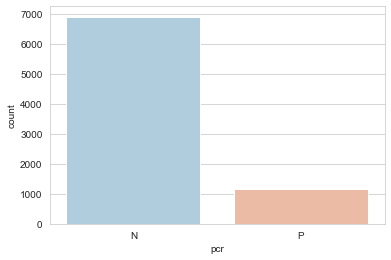

In [21]:
sns.set_style('whitegrid')
sns.countplot(x = 'pcr', data = df_tested, palette='RdBu_r')

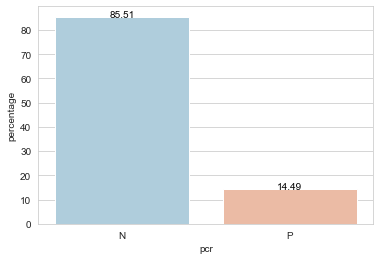

In [22]:

groupedvalues=df_tested.groupby('pcr')['patient_id'].count().rename('percentage').reset_index() 
groupedvalues['percentage'] = groupedvalues['percentage'] * 100.0 / len(df_tested)
g=sns.barplot(x='pcr',y='percentage',data=groupedvalues, palette='RdBu_r')

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.percentage, round(row.percentage,2), color='black', ha="center")

#plt.show()


Il y a 6900 tests negatifs et 1169 tests positifs. Cela donne un pourcentage de 14,49 de tests positifs.  

### Analyse par 'state'
Pour analyser géographiquement le résultat des tests, l'échelon le plus facilement utilisable est le 'state'. Nous allons regarder le resultat des tests par 'state'. 

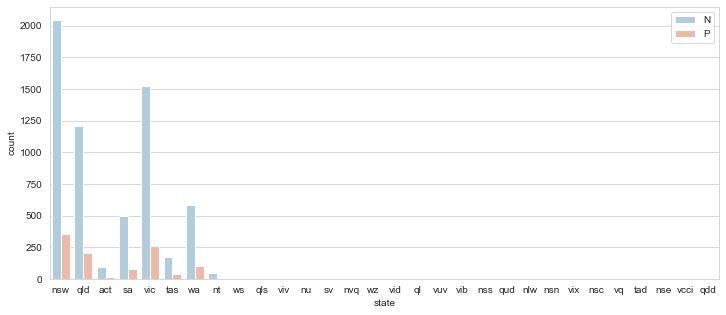

In [23]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x = 'state', hue = 'pcr', data = df_tested, palette='RdBu_r')
ax.legend(loc='upper right')

On note qu'il n'y a des tests PCR que pour 8 états: nsw, qld, act, sa, vic, tas, wa, et nt. 
Nous allons donc nous concentrer sur ces états pour la suite de l'analyse. 

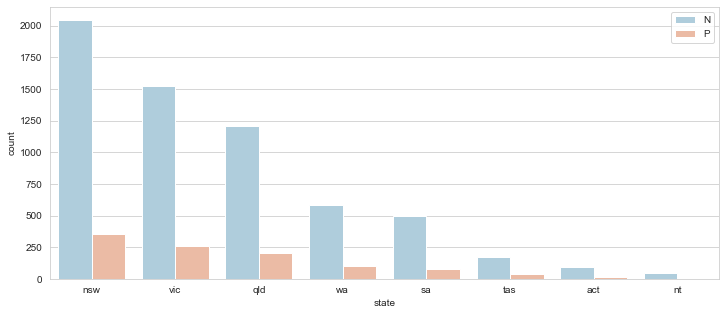

In [24]:
# countplot of the tests
plt.figure(figsize = (12,5))
ax = sns.countplot(x = 'state', hue = 'pcr', data = df_tested, palette='RdBu_r',
                   order=df_tested.state.value_counts().iloc[:8].index)
ax.legend(loc='upper right')



[Text(0, 0.5, 'Percent')]

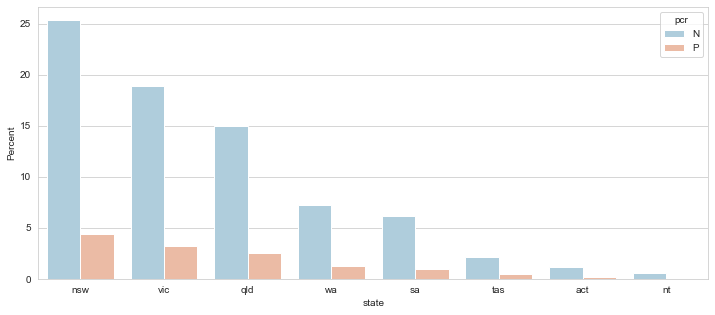

In [25]:
plt.figure(figsize = (12,5))
ax = sns.barplot(x="state", y="patient_id", hue='pcr', data=df_tested, palette='RdBu_r', 
                 estimator=lambda x: (len(x) / len(df_tested)) * 100, order=df_tested.state.value_counts().iloc[:8].index)
ax.set(ylabel="Percent")


On note que le plus grand nombre de test a été réalisé dans l'ordre pour nsw, vic et qld. On note aussi que le nombre de tests positifs suit le nombre de tests: Plus il y a de tests plus il y a de tests positifs. 

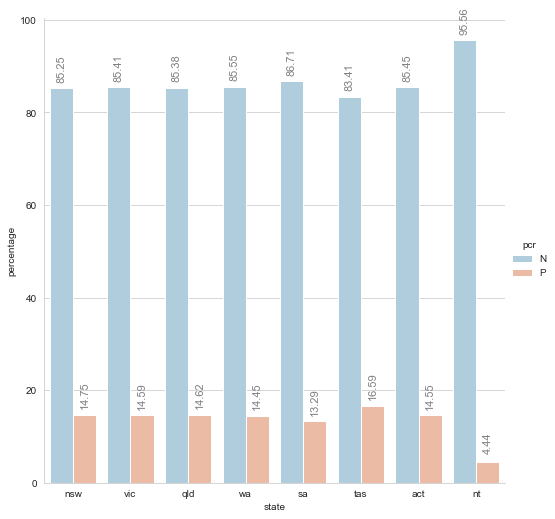

In [26]:

state_counts = (df_tested.groupby('state')['pcr']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('state'))
p = sns.catplot(x="state", y="percentage", hue="pcr", kind="bar" , data=state_counts, palette='RdBu_r',
                order=df_tested.state.value_counts().iloc[:8].index , height=7)
ax = p.ax
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                 textcoords='offset points') 



Lorsque l'on regarde le pourcentage de test positifs pour chaque 'state', on note des valeurs consistantes: entre 13,29 et 16,59 de tests positifs, hormis pour la région 'nt'. Or pour cet état le nombre de test est très failble donc peu significatif. Donc on peu conclure que le taux de positivité est de l'ordre de 14% dans les états testé hormis 'nt'. 

Pour l'analyse geographique nous avons considérés la colonne state. Mais une autre alternative pourrait être postcode. Regardons le nombre de test que nous avons par postcode. 
   

In [27]:
df_tested.groupby('postcode').count().sort_values(by='pcr',ascending=False).head(20)

,patient_id,given_name,surname,street_number,address_1,suburb,state,date_of_birth,age,phone_number,address_2,pcr
postcode,,,,,,,,,,,,
4350,40,40,39,40,39,39,37,39,29,37,13,40
2170,32,31,32,32,32,32,27,29,24,30,11,32
4670,28,28,26,28,27,27,26,28,23,26,10,28
4740,27,27,25,26,25,26,26,26,21,26,14,27
4305,27,26,27,27,25,27,27,23,22,25,8,27
2560,26,25,26,26,25,25,24,22,17,24,7,26
6210,26,26,26,24,25,26,24,22,20,23,9,26
2750,25,22,21,25,25,25,22,23,23,24,13,25
3150,24,24,23,24,22,23,21,24,18,24,9,24


Nous voyons que le postcode avec le plus de test (4350) en a 40. C'est insuffisant pour être significatif. Donc une analyse par postcode ne sera probablement pas tres pertinente. 

### Analyse de l'age des patients

<AxesSubplot:xlabel='age', ylabel='Count'>

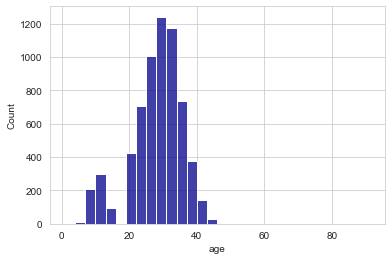

In [28]:
# age histogram
sns.histplot(df_tested['age'],kde=False,color='darkblue',bins=30)

On note plusieurs chose sur l'histogramme de l'age:  
* L'amplitude des ages semble aller de 0 à 90 ans, mais au dela de 50 ans il n'y a pratiquement pas de patient
* Pour les enfants, il y a des patients de la naissance à l'adolescence. Mais il n'a pas du tout de patients à la fin de l'adoslescence (entre 17 et 19 ans) 
* La majorité des patients se trouvent dans la fourchette 25-35 ans 

Regardons si nous pouvons extraire plus d'information avec un boxplot. 

<AxesSubplot:xlabel='pcr', ylabel='age'>

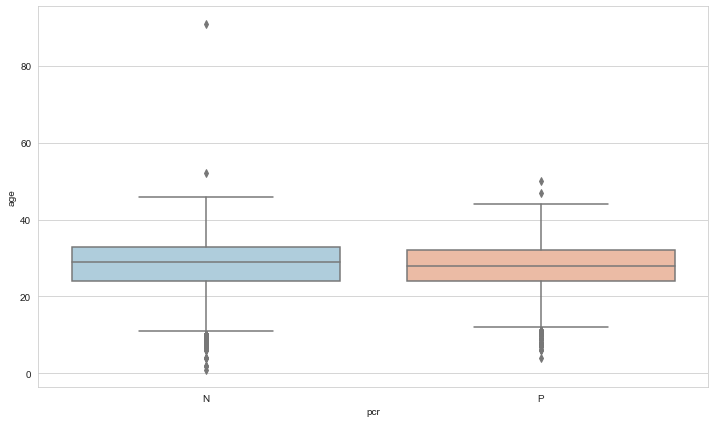

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pcr',y='age',data=df_tested, palette='RdBu_r')

Le boxplot montre qu'il y a un 'outlier': Un patient de plus de 90 ans. Nous avons également la confirmation que la majorité des patients se trouvent dans la fourchette 25-35 ans. La médiane est légèrement inférieure pour les patients avec un test positif. 
Regardons un peu plus en détail les résultats des tests. 
Nous avons enlevé le patient de plus de 90 ans du graphique. 


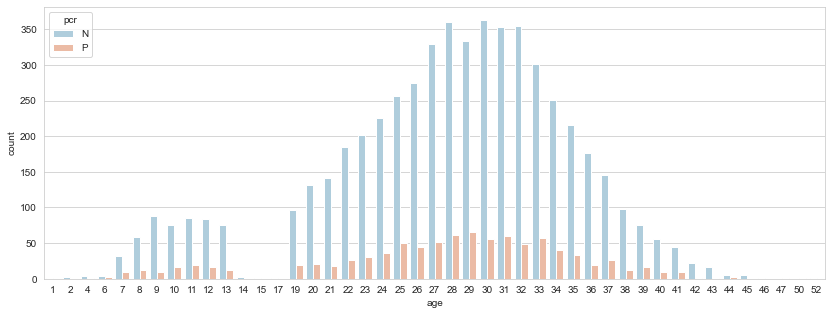

In [30]:
fig, ax1 = plt.subplots(figsize = (14,5))
sns.countplot(x = 'age', hue = 'pcr', palette='RdBu_r', data = df_tested[df_tested['age'] < 91.0])
ax1.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])
ax1.xaxis.set_tick_params()

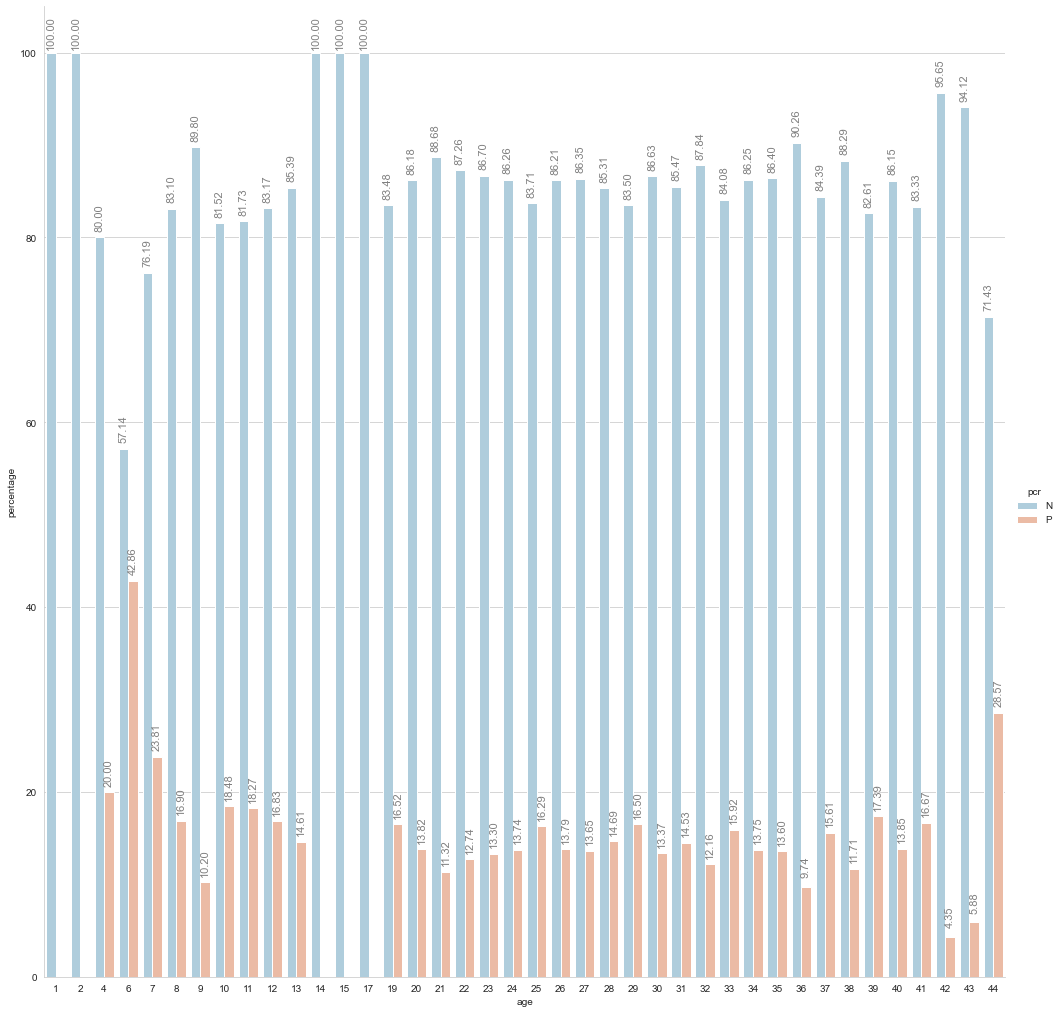

In [31]:
# fig, ax1 = plt.subplots(figsize = (14,5))

age_counts = (df_tested[df_tested['age'] < 45.0].groupby('age')['pcr']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('age'))

p = sns.catplot(x="age", y="percentage", hue="pcr", kind= "bar", palette='RdBu_r', height=14, data=age_counts)
ax = p.ax

ax.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
ax.xaxis.set_tick_params()

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                 textcoords='offset points') 


Pour les adultes, les tests les plus significatifs (plus de 100 tests) sont pour les ages compris entre 19 et 38 ans. On voit cela sur le premier graphique ci-dessus. Pour les enfants les tests significatifs sont pour les ages 9-13 ans. 
Parmi ces ages, on note des disparités: les enfants de 9 ans ont le plus faible taux de positivité: 10,20%. Mais pour les enfants de 10 ans, ce taux monte à 18,48%.   
Pour les adultes le taux varie de 9.74% (36 ans) à 16,52% (19 ans). Mais le mode (le taux le plus fréquent) est de l'ordre de 13%. Nous sommes encore très proche du taux de positivité par région qui était de l'ordre de 14%. 

Essayons de voir, si la représentation est plus synthétique en utilisant des classes d'age. 

In [32]:
# Add an age-class column
cut_labels = ['0-9', '10-19', '20-29', '30-39', '>40']
cut_bins = [0.0, 10.0, 20, 30, 40, 92.0]
df_tested['age-class'] = pd.cut(df_tested['age'], bins=cut_bins, labels=cut_labels)

In [33]:
df_tested.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr,age-class
0,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown,N,30-39
1,744167,ky,laing,448.0,nyawi place,barmera,3556,qld,19050919.0,32.0,03 59872070,None,N,30-39
2,210268,matthew,laing,11.0,barnes place,laurieton,2160,nsw,19061018.0,29.0,02 86925029,None,N,20-29
3,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill,N,30-39
4,154886,adele,ryan,76.0,house circuit,new farm,2200,qld,19430102.0,33.0,07 37444521,None,N,30-39


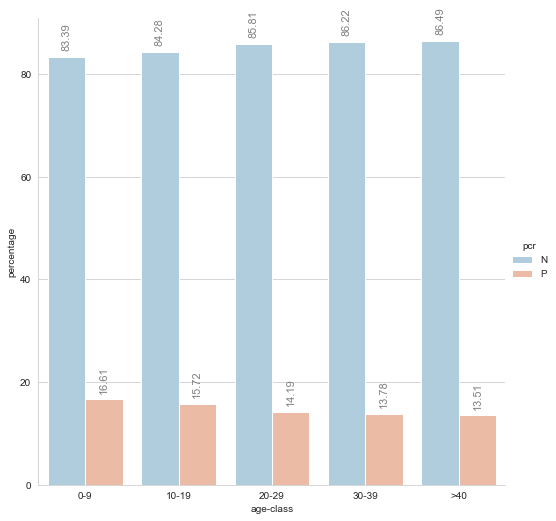

In [34]:
age_counts = (df_tested.groupby('age-class')['pcr']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('age-class'))
p = sns.catplot(x="age-class", y="percentage", hue="pcr", kind= "bar", palette='RdBu_r', height=7, data=age_counts)
ax = p.ax

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                 textcoords='offset points')

On retrouve un taux de positivité entre 13.51% et 16.61% selon les classes d'age. Et chez les adultes entre 20 et 40 ans un taux de positivité de l'ordre de 40%. 

## Conclusion
Lors de cette analyse exploratoire, nous avons montrés que les tests valides ne concernaient que 8069 personnes sur le dataset initial de 20 000 personnes. De plus ces tests étaient limités à 8 états (state) seulement: nsw, qld, act, sa, vic, tas, wa, et nt. Pour les 7 états pour lesquels les tests sont suffisamment nombreux pour être significatifs, nous avons vu que le taux de positivité est de l'ordre de 14%. 
D'autre part, l'analyse du taux de positivité par age à montré que pour les adultes ce taux est également de l'ordre de 14%, et un peu plus élevé pour les enfants de moins de 10 ans (16.61%) et les adolescents (15.72%). 